In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
train = pd.read_csv("./data/train.csv", sep="###__###",header = None,encoding='utf8')
test = pd.read_csv("./data/test.csv", sep="###__###",header = None,encoding='utf8')

In [3]:
train.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']
train.head()

,ID,Age,Gender,Education,Query_List
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


In [4]:
test.columns = ['ID', 'Query_List']
test.head()

,ID,Query_List
0,ED89D43B9F602F96D96C25255F7C228C,陈学冬将出的作品\t刘昊然与谭松韵\t211学校的分数线\t谁唱的味道好听\t吻戏是真吻还是...
1,83C3B7B4AAF8074655A8079F561A76D6,e的0.0052次方\tqq怎么快速提现\t绝色倾城飞烟\t马克思主义基本原理概论\t康世恩...
2,CA9F675A024FB2353849350A35CF8B0F,黑暗文\tlpl夏季赛\t大富豪电玩城\t英雄联盟之电竞称王\t手机怎么扫描手机上的二维码\...
3,DE45B5C4E57AAEBCF3FDFA2A774093BF,中秋水库钓鱼\t鱼竿\t用蚯蚓钓鱼怎样调漂\t传统钓\t3号鱼钩\t鲫鱼汤的做法大全\t鱼饵...
4,406A681FB3DF81EC0E561796AE50AE50,号码吉凶\t退休干部死后配偶\t郫县有哪些大学\t胜利油田属于中石化还是中石油\t苏珊米勒狮...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          100000 non-null  object
 1   Age         100000 non-null  int64 
 2   Gender      100000 non-null  int64 
 3   Education   100000 non-null  int64 
 4   Query_List  100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          38996 non-null  object
 1   Age         38996 non-null  int64 
 2   Gender      38996 non-null  int64 
 3   Education   38996 non-null  int64 
 4   Query_List  38996 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


<AxesSubplot:>

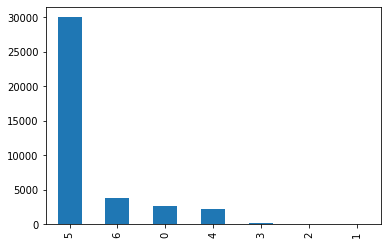

In [20]:
df1['Education'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

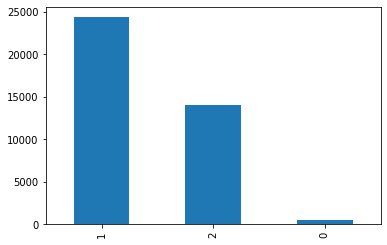

In [28]:
df1['Gender'].value_counts().plot(kind = 'bar')

In [55]:
import jieba
seg_list = jieba.cut("我来到北京清华大学",cut_all=False)

In [56]:
'/'.join(seg_list)

'我/来到/北京/清华大学'

In [57]:
def seg(query):
    query_list_new = []
    query_list = query.split('\t')
    for i in query_list:
        seg_list = jieba.cut(i,cut_all=False)
        segment = '/'.join(seg_list)  
        query_list_new.append(segment)
    return '\t'.join(query_list_new)

In [60]:
train['Query_List_New'] = train['Query_List'].apply(seg)

In [61]:
train

,ID,Age,Gender,Education,Query_List,Query_List_New
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,柔和/双沟\t女生\t中财网/首页/ /财经\thttp/://///pan/./baidu...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,钻石/之泪/耳机\t盘锦/到/沈阳\t旅顺/公交\t辽宁/阜新/车牌\tbaidu\tk71...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,最/受欢迎/狗狗/排行榜\t舶/怎么/读\t场景/描/ /写/范例\t三维/绘图/软件\t枣...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...
...,...,...,...,...,...,...
99995,E797FFCDCAF3899AB4D17B61170D8BFF,1,1,5,梦三生\t逆行天后漫画结局\t英雄联盟角色介绍大全\t韩剧网最新韩国电视剧\t119宣传语是...,梦/三生\t逆行/天后/漫画/结局\t英雄/联盟/角色/介绍/大全\t韩剧/网/最新/韩国/...
99996,E06375F7D092ABDE78C2D79E4725D6B0,1,1,5,中国军队配枪\t女生\t央视版权问题\t重庆\t一次性手术刀\t精神枷锁\t人民检察官\t舆...,中国/军队/配枪\t女生\t央视/版权/问题\t重庆\t一次性/手术刀\t精神枷锁\t人民/...
99997,D55119CB0B9366B20974522B58C00912,2,2,5,英文翻译\t幼儿园面试讲课\t学前教育书第二版\tshock to\t幼儿园教师资格证面试讲...,英文翻译\t幼儿园/面试/讲课\t学前教育/书/第二/版\tshock/ /to\t幼儿园/...
99998,EB4DBBD602C6459A19A77F09035E170C,3,2,3,哈尔滨祖研中医院地址\t指甲盖侧面的肉怎么是白色\t补骨质有副作用吗\t哈尔滨去呼兰\t黑龙...,哈尔滨/祖研/中/医院地址\t指甲盖/侧面/的/肉/怎么/是/白色\t补/骨质/有/副作用/...


In [64]:
import re

In [75]:
def num_tag(x):
    query = x.split('\t')
    num_query = []
    for i in query:
        if re.search(r'\d',i):
            num_query.append(i)
    if num_query:
        return '\t'.join(num_query)

In [76]:
train['num_tag'] = train['Query_List_New'].apply(num_tag)

In [14]:
pd.set_option('max_colwidth', 512)

In [87]:
train.to_csv('train1.csv',encoding='utf8')

In [4]:
import pandas as pd
train = pd.read_csv('train1.csv',encoding='utf8')

In [18]:
# 引入词性标注接口
import jieba.posseg as psg

text = "在"
#词性标注
speech_tag = []
d = {}
for i in stop_words:
    seg = psg.cut(i)
    for x in seg:
        d[x.word] = x.flag

In [23]:
u_list = []
for i in d:
    if d[i] == 'u':
        u_list.append(i)

In [24]:
u_list

['之', '似的', '则甚', '等', '来看', '来说', '的话', '矣哉', '等等', '般的']

In [9]:
df1 = train[train['Age']==1]
df2 = train[train['Age']==2]
df3 = train[train['Age']==3]
df4 = train[train['Age']==4]
df5 = train[train['Age']==5]
df6 = train[train['Age']==6]

In [4]:
df7 = train[train['Gender']==1]
df8 = train[train['Gender']==2]
df9 = train[train['Gender']==0]

In [6]:
train['Education'].unique()

array([4, 3, 0, 5, 2, 6, 1], dtype=int64)

In [5]:
df10 = train[train['Education']==1]
df11 = train[train['Education']==2]
df12 = train[train['Education']==3]
df13 = train[train['Education']==4]
df14 = train[train['Education']==5]
df15 = train[train['Education']==6]
df16 = train[train['Education']==0]

In [6]:
df15

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag
54,54,E4F98780A462BF5697BBF81E9638F2E3,1,1,6,直升机空战中文版破解 无限金币\t63km等于多少公里\t普通墨镜\t陈赫那里人\t福州\t...,直升机/空战/中文版/破解/ /无限/金币\t63km/等于/多少/公里\t普通/墨镜\t陈...,63km/等于/多少/公里\t4008277828/@/b/./qq/./com\t36o/...
93,93,63E8EFD076E5D0C29EA6CD3446957898,1,2,6,我的课余生活作文300字\t做自己喜欢的事作文\tangelababy\t水浒传的人物五位\...,我/的/课余/生活/作文/300/字\t做/自己/喜欢/的/事/作文\tangelababy...,我/的/课余/生活/作文/300/字\t关于/开学/了/小/练笔/200/字\t关于/开学/...
127,127,2AB1B6F4D8043992C5BE75B158172265,1,2,6,大白兔奶糖的寓意\t中国女排\t张鲁一\t微微一笑很倾城电影演员表\t上饶汽车站\toppo...,大白兔/奶糖/的/寓意\t中国女排\t张鲁一\t微微一笑/很/倾城/电影演员/表\t上饶/汽...,oppor9\t2016/年/证券/从业/资格考试/时间\t9.21/是/什么/星座\t逻辑...
132,132,D0E9FCC676DDB953D6C24C372B391C0B,1,2,6,奇迹暖暖小画家\t恋爱火花\t溜来\tqq被虚拟机登录什么情况\t奇迹暖暖第十章过关套装\t...,奇迹/暖/暖/小/画家\t恋爱/火花\t溜/来\tqq/被/虚拟机/登录/什么/情况\t奇迹...,奇迹/暖/暖/1/次/几个/桂花/糕\t生物学/补充/习题/8/年纪/上册/苏教版/徐州\t...
174,174,B2270A7D8755E35148CDB6561CD806A8,1,0,6,蛇蛇大作战手机版\t煮妇也疯狂相思成疾\t新水浒传西门庆是哪集\t水浒传潘金莲和西门\t流氓...,蛇/蛇/大/作战/手机/版\t煮妇/也/疯狂/相思/成疾\t新/水浒传/西门庆/是/哪集\t...,流氓/片/360/个/视频/视频\t36o\t4399/生死/狙击\t酷/我/音乐盒/手机/...
...,...,...,...,...,...,...,...,...
99924,99924,D5B7C45F21BBB8B1073E6212741585DD,1,1,6,罗基铭\t龙王传说\t南方冬天有什么景物\t罗俊\t血族小说\tcf\t手机病毒不能卸载不了...,罗基铭\t龙王/传说\t南方/冬天/有/什么/景物\t罗俊\t血族/小说\tcf\t手机/病...,龙族/4\t龙族/5
99942,99942,ACDF87BFBBC8946B0DD6DEE9A6EC90FD,1,1,6,百多邦软膏的作用价格\t激光点痣第七天还没有结痂\t微信\t维生素e胶丸\t清远两年的车如何...,百多/邦/软膏/的/作用/价格\t激光/点痣/第七天/还/没有/结痂\t微信\t维生素/e/...,601717\t37/岁/做/激光/点/痣/会/有/红印/吗\t5/ /5/ /5/ /55...
99943,99943,37BB527D0ACD53FB0B9FCF44133944DD,1,1,6,qq头像\tlol逃跑惩罚\t北京时间\t电玩巴士\t电玩飞机视频\t刀锋女王莫甘娜小智解说...,qq/头像\tlol/逃跑/惩罚\t北京/时间\t电玩/巴士\t电玩/飞机/视频\t刀锋/女...,1991/-/8/-/22\t苹果/6splus/多少/钱\t球球/大/作战/九月/黄金/段...
99954,99954,0A55FEC325C89F6A4AE0F5084A500B16,1,2,6,老兵为马本斋守墓\t吉林大学校园命案\t农妇坐11年冤狱\t别墅群荒废似鬼城\t赵薇和章子怡...,老兵/为/马本斋/守墓\t吉林大学/校园/命案\t农妇/坐/11/年/冤狱\t别墅/群/荒废...,农妇/坐/11/年/冤狱\t老人/要/1/元/赡养费\t夫妇/20/年生/13/个/儿子\t...


,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag
20,20,B62AB59182F2C975FE0A7CDDAB8294AE,3,1,2,"普通脉冲雷达怎么抑制地面回波\t郭富城电影\tvc怎么解码h.264\t抓鸟判刑,民众保护意识淡薄\t举起手来\t人民检察官\t挑拨陕西拉链市长庞家玉\t永历四年小说\t宋哲宗下任皇帝\t海蟹\th.264 编码用什么能播放\tccs5.5 pending reboot\t昔日的德阳理科状元丁春秋\twindow系统串口通信\t什邡状元李春秋\t大闸蟹\t伦敦陷落\t宋哲宗\t发动机转速2000以上,噪声很大,以前没有这种\t什邡的高考状元现状\th.264编码器输出使用什么可以播放\t四川大学任荣\tvivox7处理器和iphone6s处理器\t冷冻胚胎\tvivox7处理器和oppor9处理器\t末日孤舰第三季剧情\t最新电影\t051982087213\t无法打开包括文件opencv2/core/core_c.h100\t成都华西附属二医院\t春秋我为王\t脉冲多普勒雷达\t成都华西妇女儿童医院\t华西附二院优生优育科\t绵阳周边旅游景点大全\t陕西拉链市长为什么这么久都不倒\t关节退行性变怎么治\t蔡英文\t红巾军军歌\topencv2.3.1中没有cvvimage\t苏联解体后分为几个国家\...","普通/脉冲雷达/怎么/抑制/地面/回波\t郭富城/电影\tvc/怎么/解码/h.264\t抓鸟/判刑/,/民众/保护意识/淡薄\t举起手来\t人民/检察官\t挑拨/陕西/拉链/市长/庞家玉\t永历/四年/小说\t宋哲宗/下/任/皇帝\t海蟹\th.264/ /编码/用/什么/能/播放\tccs5.5/ /pending/ /reboot\t昔日/的/德阳/理科状元/丁春秋\twindow/系统/串口/通信\t什邡/状元/李/春秋\t大闸蟹\t伦敦/陷落\t宋哲宗\t发动机/转速/2000/以上/,/噪声/很大/,/以前/没有/这种\t什邡/的/高考状元/现状\th.264/编码器/输出/使用/什么/可以/播放\t四川大学/任荣\tvivox7/处理器/和/iphone6s/处理器\t冷冻/胚胎\tvivox7/处理器/和/oppor9/处理器\t末日/孤舰/第三季/剧情\t最新/电影\t051982087213\t无法/打开/包括/文件/opencv2///core///core/_/c/./h100\t成都/华西/附属/二/医院\t春秋/我/为/王\t脉冲/多普勒/雷达\t成都/华西/妇女/儿童医院...","vc/怎么/解码/h.264\th.264/ /编码/用/什么/能/播放\tccs5.5/ /pending/ /reboot\t发动机/转速/2000/以上/,/噪声/很大/,/以前/没有/这种\th.264/编码器/输出/使用/什么/可以/播放\tvivox7/处理器/和/iphone6s/处理器\tvivox7/处理器/和/oppor9/处理器\t051982087213\t无法/打开/包括/文件/opencv2///core///core/_/c/./h100\topencv2.3/./1/中/没有/cvvimage\tti/ /6678/ /h.264/编码器/输出/什么\t绵阳/科委/立交/凯得/广场/前面/有没有/红绿灯/,/刚/?/vivox7\t成都/29/所/社招\t192.168/./1.1\tvc2010/使用/opencv2.2/打开/摄像头/不能/显示图/?/量/中华/之/物力/ /结与国/之/欢心\tiphone6s/的/处理器\th.264/编码器/输出/的/数据/使用/什么/可以/播放\tccs5.5/中/的/project/_/root\t后缀名/为/264\t无法..."
37,37,9AFBFEFEB2D88BC16269840ABA033226,1,1,2,高虹镇\t今年台风最新消息\t刘赙\t嘉庆\t2016台风最新消息\t2016年12号台风\t其貌不扬\t浙江台风\t三星c7\t卧龙谷地图\t第12号台风生成\t处暑\t第10号台风最新消息\t温州台风网 台风路径 当前台风\t乡镇换届选举工作总结\t南昌市\t予灵镇鸿都购物广场服装区\t刘兴\t雁荡卧龙谷地图\t杭州g20安保\t中国台风网\t马勒卡台风\t萍乡\t2016年台风最新消息\t华为荣耀8多少钱\t温州台风\t最新台风莫兰蒂\t2016年第14号台风\t2016台风消息\t早泄\t西北太平洋台风\t痒\t高虹\t莆田市\t西汉皇帝列表\t2016台风\t雁荡山玻璃栈道\t不能勃起的原因有哪些\t莫兰蒂台风\t2016年第13号台风\t临安青山湖\t2016年乡镇换届选举\t华阴\t2016年马勒卡台风实时\t梧州地震\t温州经济\t雁荡镇\t灵宝市予灵镇鸿都购物广场新闻\t宜春\t沂怎么读音\t得能湖公园\t华为荣耀864g多少钱\t舒淇\t聚焦g2o\t雁荡镇党委书记\t2016年第9号台风\t灵宝市予灵镇鸿都购物广场\t莫兰蒂台风最新消息\t高尿酸血症\t刘欣儿子\t乐清雁荡雁遇店...,高虹镇\t今年/台风/最新消息\t刘/赙\t嘉庆\t2016/台风/最新消息\t2016/年/12/号/台风\t其貌不扬\t浙江/台风\t三星/c7\t卧龙/谷/地图\t第/12/号/台风/生成\t处暑\t第/10/号/台风/最新消息\t温州/台风/网/ /台风/路径/ /当前/台风\t乡镇/换届选举/工作/总结\t南昌市\t予灵镇/鸿/都/购物广场/服装/区\t刘兴\t雁荡/卧龙/谷/地图\t杭州/g20/安保\t中国/台风/网\t马勒/卡/台风\t萍乡\t2016/年/台风/最新消息\t华为/荣耀/8/多少/钱\t温州/台风\t最新/台风/莫兰蒂\t2016/年/第/14/号/台风\t2016/台风/消息\t早泄\t西北/太平洋/台风\t痒\t高虹\t莆田市\t西汉/皇帝/列表\t2016/台风\t雁荡山/玻璃/栈道\t不能/勃起/的/原因/有/哪些\t莫兰蒂/台风\t2016/年/第/13/号/台风\t临安/青山湖\t2016/年/乡镇/换届选举\t华阴\t2016/年/马勒/卡/台风/实时\t梧州/地震\t温州/经济\t雁荡/镇\t灵宝市/予灵镇/鸿/都/购物广场/新闻\t宜春\t沂/怎么/读...,2016/台风/最新消息\t2016/年/12/号/台风\t三星/c7\t第/12/号/台风/生成\t第/10/号/台风/最新消息\t杭州/g20/安保\t2016/年/台风/最新消息\t华为/荣耀/8/多少/钱\t2016/年/第/14/号/台风\t2016/台风/消息\t2016/台风\t2016/年/第/13/号/台风\t2016/年/乡镇/换届选举\t2016/年/马勒/卡/台风/实时\t华为/荣耀/864g/多少/钱\t聚焦/g2o\t2016/年/第/9/号/台风\t中国/台风/网/2016\t2016/年/9/号/台风\t2o16/年/第/12/号/台风\t2016/年/第/13/号/台风/玛瑙\t2o16/年/台风/最新消息\t最新/台风/消息/号/2016\t2016/年/第/10/号/台风\tg20\t2016/最新/台风\t2016/第/12/号/台风\t2016/年/12/号/台风/南川\t2016/年/第/12/号/台风/生成\t2016/第/10/号/台风\t海南/台风/最新消息/2016\t2016/年/第/14/号/台风/生成\t杭州/g20/安保/措施\t2016/年...
49,49,D85AA6929207EF5EEE6DD79287D0085E,4,2,2,"微言情\t黄金换彩金划算吗\t小孩子生病了送什么礼物\t蛋糕图片\t少林寺在哪里个城市\t最霸气的话\t喝藕粉能吃香蕉吗\t少林寺\t藕粉的作用与功效\t漂流瓶图片\ts925是什么金\t桂圆莲子粥\t下一秒\t香菇的做法\t牛牛怎么玩\t吃洋葱能喝藕粉莲子汤吗\t白芍的功效与作用\t善言\t这首歌十人九醉\t中秋节红包多少比较合适\toh啥意思\t头像圈\t核桃黄豆浆有什么营养\t老凤祥女士金项链款式\t远志的功效与作用\t短信祝福\t笔记本电脑\t山药和核桃能一起吃吗\t欲望大过爱情\t联想笔记本电脑哪款好\t怎样贴钢化手机膜\t头像圈子\t猜出你就是神\t运动心得体会\t老凤祥彩金换黄金\t关于朋友的歌\t赠送险的保单怎么查询\t核桃和火龙果能一起吃\t喝藕粉有什么禁忌\t朋友生日唱什么歌好\t哪里黄金便宜\t游戏斯诺克台球\t武当山门票\t时光不老我们不散下一句\t朋友生日发微信红包发多少\t好现实的话 句句精辟\t一茶一诗一梦,闲人闲花闲情\t最大气的一段话,句句精辟\t眼睛疼头疼是怎么回事\t生日发多少红包合适\t人也舒坦心也舒坦\t手机斯诺克游戏\t铁棍山药的功效与作用\t我不想说 杨钰...",微/言情\t黄金/换彩金/划算/吗\t小孩子/生病/了/送/什么/礼物\t蛋糕/图片\t少林寺/在/哪里/个/城市\t最/霸气/的话\t喝/藕粉/能/吃/香蕉/吗\t少林寺\t藕粉/的/作用/与/功效\t漂流瓶/图片\ts925/是/什么/金\t桂圆/莲子粥\t下/一秒\t香菇/的/做法\t牛牛/怎么/玩\t吃/洋葱/能/喝/藕粉/莲子汤/吗\t白芍/的/功效/与/作用\t善言\t这/首歌/十人九醉\t

In [8]:
num['tag1'] = num['num_tag'].apply(lambda x:1 if '多少' in x else 0)

<ipython-input-8-b2c1fd9b4e75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['tag1'] = num['num_tag'].apply(lambda x:1 if '多少' in x else 0)


In [6]:
num = train[train['num_tag'].notnull()]

In [11]:
num1 = num[num['tag1']==1]

<AxesSubplot:>

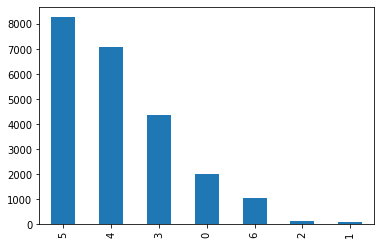

In [105]:
num1['Education'].value_counts().plot(kind='bar')

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,16))

<Figure size 1440x1152 with 0 Axes>

In [15]:
num1

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag1
0,0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,柔和/双沟\t女生\t中财网/首页/ /财经\thttp/://///pan/./baidu...,http/://///pan/./baidu/./com///s///1plpjtn9\t周...,1
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\...",250ml/牛奶/用/多少/克/奶粉/冲\t学会/爱/自己/ /才/会/真正/懂得/爱/10...,1
4,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...,12306\t唯品/会上/卖/的/ipadair32g/真的假/的\tipad/ /air2...,1
7,7,0BA56489237BC91353300BE44298C6D8,6,1,0,昂的笔顺\t三年级上册数学口算\t牛的英语怎么读\t抓木机\t60米差不多跑多长时间\t似乎...,昂/的/笔顺\t三年级/上册/数学/口/算\t牛/的/英语/怎么/读\t抓/木机\t60/米...,60/米/差不多/跑/多长时间\tw0rd2007/以上/版是/哪种\t320/接近/300...,1
12,12,3CEC23FD112E92FD34339A1D18208F9B,3,2,3,电信宽带送手机\t李敏镐做饭\thpv是什么\t无锡人民医院皮肤科\t乘法运算定律\t历年金...,电信宽带/送/手机\t李敏/镐/做饭\thpv/是/什么\t无锡/人民/医院/皮肤科\t乘法...,王思聪/保时捷/918\t无锡/地铁/1/号线\t中国/成立/多少/周年/2016,1
...,...,...,...,...,...,...,...,...,...
99977,99977,EB3824FE3721B66F4E9208024BC53364,1,1,5,水加盐\t充满维生素c的食物\t去痘印最有效的方法\t男性内分泌失调\t宝马x6\t全球最恶...,水/加盐\t充满/维生素/c/的/食物\t去/痘/印/最/有效/的/方法\t男性/内分泌/失...,宝马/x6\toppor7\tvivox7plus/多少/钱/一部\t咸猪/手/视频/5/分...,1
99980,99980,90EB3563191F2CAA64C9E95B8E022EF6,1,1,4,特仑苏一天喝多少合适1001特仑苏一天喝多少\t开车方向盘打死对车有什么影响1001开车方向...,特仑苏/一天/喝/多少/合适/1001/特仑苏/一天/喝/多少\t开车/方向盘/打死/对车/...,特仑苏/一天/喝/多少/合适/1001/特仑苏/一天/喝/多少\t开车/方向盘/打死/对车/...,1
99987,99987,362E66D7D852A70589187D6337A089D7,1,1,5,记得小学每天放学都去打球\t什么时候可以穿长袖\t我喜欢听你说话看你爱笑的眼睛\t演员\t魅...,记得/小学/每天/放学/都/去/打球\t什么/时候/可以/穿/长袖\t我/喜欢/听/你/说话...,苹果/6/好/还是/6plus/好\t苹果/6s\t为什么/手机/快递/还要/50/押金\t...,1
99991,99991,FD2BB80457ED4E2222D6D65B5C0A6081,3,1,3,大乐透\t以战止战\t重生成树\t可以延时的避孕套\toppor9\t哦马立北北馄\t甘肃省...,大乐透\t以/战止战\t重/生成/树\t可以/延时/的/避孕套\toppor9\t哦/马立/...,oppor9\t魅族/mx5\t中年/女士/中/752/万\t三星/a7100\t05/ /...,1


<AxesSubplot:>

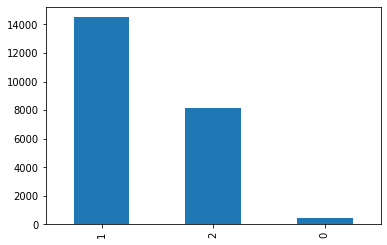

In [17]:
num1['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

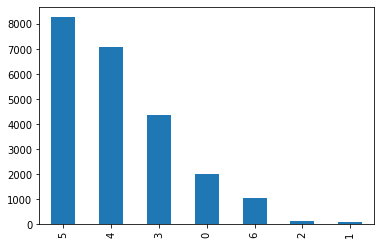

In [19]:
num1['Education'].value_counts().plot(kind='bar')

In [27]:
num

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag1
0,0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,柔和/双沟\t女生\t中财网/首页/ /财经\thttp/://///pan/./baidu...,http/://///pan/./baidu/./com///s///1plpjtn9\t周...,1
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\...",250ml/牛奶/用/多少/克/奶粉/冲\t学会/爱/自己/ /才/会/真正/懂得/爱/10...,1
2,2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,钻石/之泪/耳机\t盘锦/到/沈阳\t旅顺/公交\t辽宁/阜新/车牌\tbaidu\tk71...,k715\tk716\t雷克萨斯/nx300h/价格\t苹果/7/合约/套餐\t网盘/007...,0
3,3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,最/受欢迎/狗狗/排行榜\t舶/怎么/读\t场景/描/ /写/范例\t三维/绘图/软件\t枣...,豆桨/和/面皮/能/一起/1/吃/吗\t新闻/2o16\tg20/峰会,0
4,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...,12306\t唯品/会上/卖/的/ipadair32g/真的假/的\tipad/ /air2...,1
...,...,...,...,...,...,...,...,...,...
99995,99995,E797FFCDCAF3899AB4D17B61170D8BFF,1,1,5,梦三生\t逆行天后漫画结局\t英雄联盟角色介绍大全\t韩剧网最新韩国电视剧\t119宣传语是...,梦/三生\t逆行/天后/漫画/结局\t英雄/联盟/角色/介绍/大全\t韩剧/网/最新/韩国/...,119/宣传语/是/什\t78/的/历史\t斗破/苍穹/之/肆虐/彩鳞/4\t龙族/2/漫画...,0
99996,99996,E06375F7D092ABDE78C2D79E4725D6B0,1,1,5,中国军队配枪\t女生\t央视版权问题\t重庆\t一次性手术刀\t精神枷锁\t人民检察官\t舆...,中国/军队/配枪\t女生\t央视/版权/问题\t重庆\t一次性/手术刀\t精神枷锁\t人民/...,cctv1/以往/节目单\tmh370\t411949953886\tcctv1/节目单\t...,0
99997,99997,D55119CB0B9366B20974522B58C00912,2,2,5,英文翻译\t幼儿园面试讲课\t学前教育书第二版\tshock to\t幼儿园教师资格证面试讲...,英文翻译\t幼儿园/面试/讲课\t学前教育/书/第二/版\tshock/ /to\t幼儿园/...,"我能/每次/主动/找/你/,/是因为/曾经/你/在/我/心里/有/?/oppo819",0
99998,99998,EB4DBBD602C6459A19A77F09035E170C,3,2,3,哈尔滨祖研中医院地址\t指甲盖侧面的肉怎么是白色\t补骨质有副作用吗\t哈尔滨去呼兰\t黑龙...,哈尔滨/祖研/中/医院地址\t指甲盖/侧面/的/肉/怎么/是/白色\t补/骨质/有/副作用/...,500/克是/多少/斤\t小米/5\t小米/5s\t白/蒺藜/子/多少/钱/一斤/1001/...,1


In [35]:
s = 'G7106'

In [46]:
import re
def train_tag(s):
    if re.search(r'^(k|t|z|g)\d+$',s,flags=re.I):
        return 1
    elif '12306' in s:
        return 1
    else:
        return 0

In [47]:
num['train_tag'] = num['num_tag'].apply(train_tag)

<ipython-input-47-7899aabd75b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['train_tag'] = num['num_tag'].apply(train_tag)


In [71]:
t = num[num['train_tag']==1]

<AxesSubplot:>

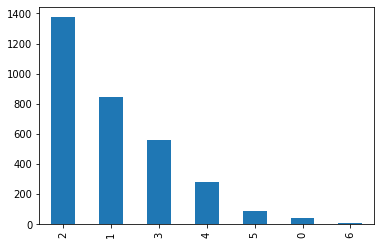

In [72]:
t['Age'].value_counts().plot(kind='bar')

In [2]:
stop_words = []
with open('./data/stopwords.txt','r',encoding='utf8') as f:
    for i in f:
        i = i.replace('\n','')
        stop_words.append(i)

In [51]:
for i in stop_words:
    if 

SyntaxError: unexpected EOF while parsing (<ipython-input-51-a4efae0fe259>, line 1)

In [13]:
df2.head(100)

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\...",250ml/牛奶/用/多少/克/奶粉/冲\t学会/爱/自己/ /才/会/真正/懂得/爱/10...
4,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...,12306\t唯品/会上/卖/的/ipadair32g/真的假/的\tipad/ /air2...
13,13,76115B7052E2D3C40C731F6ACB40907D,2,1,4,功夫圣医叶诚\tvivox7处理器位数\t近身保镖\t大主宰\t上龙\t网王幻之子\t绝色老...,功夫/圣医叶诚\tvivox7/处理器/位数\t近身/保镖\t大/主宰\t上龙\t网王/幻之...,vivox7/处理器/位数\toppor9/跟/vivox7/哪个/好\tvivox7\t魅...
18,18,FE0FE26A221ABC61997986CAC2BB82FF,2,2,4,奶油柠檬漫画\t精灵梦叶罗丽第五季\t广播\t师大的被褥贵么\t联想700s怎么关不机\t密...,奶油/柠檬/漫画\t精灵/梦叶罗丽/第五/季\t广播\t师大/的/被褥/贵/么\t联想/70...,联想/700s/怎么/关不机\t密室/逃脱/10/第/14/关/开门/密码\t联想/700s...
24,24,266B8A299027974CC66FB5E0B398B8B2,2,1,5,建设银行卡能同时办两张吗\t膜西蓝膜是哪个国家的\t一双耐克帆布鞋猜猜是什么\t旋风少女2若...,建设/银行卡/能/同时/办/两张/吗\t膜/西蓝膜/是/哪个/国家/的\t一双/耐克/帆布鞋...,旋风/少女/2/若白/去/哪/了\t三星/2000\t结婚证/办理/流程/2015\t旋风/...
...,...,...,...,...,...,...,...,...
367,367,AEA407DF6A3C5FB47F91F913885B1FBF,2,2,5,萧逸才\t花儿与少年拍摄\t为什么遇见王沥川现在才播\t陨铜\tsupreme怎么念\t老九...,萧/逸才\t花儿/与/少年/拍摄\t为什么/遇见/王沥川/现在/才播\t陨铜\tsuprem...,2020/奥运会\t史上/最坑/爹/的/游戏/5/攻略\tiphone5\tiphone6\...
373,373,8369286E2F998E6CF94F347B0769FE4D,2,1,4,i love you很缓和的英语歌曲\t手机支付宝最新版本下载\t成龙电影大全免费观看\t日...,i/ /love/ /you/很/缓和/的/英语/歌曲\t手机/支付宝/最新/版本/下载\t...,僵尸/道长/2\t98362/是/什么/意思\t武汉/413/路/公交车/路线\t淘宝/保证...
378,378,06EDE95A45A5AE07532F7894692E0AD8,2,2,5,天使的翅膀简笔画\t银杏树\t俄语字母发音下载\t葛优瘫怎么改成自己图片\t工藤九美子\t专...,天使/的/翅膀/简笔画\t银杏树\t俄语/字母/发音/下载\t葛优/瘫/怎么/改成/自己/图...,专业/四级/作文/2012/答案\t基础/英语/3/戴炜栋\t1/斤/等于/多少/克\t英语...
382,382,C4A524D25F23C2045D3B52B2C56A3335,2,1,5,虎牙仙凡老婆照片\t朴妮唛百度云\tc语言\t义渠王结局\t三一重工\t2015年好声音冠军...,虎牙/仙凡/老婆/照片\t朴妮/唛/百度/云\tc/语言\t义渠王/结局\t三一/重工\t2...,2015/年/好/声音/冠军\t163/结尾/的/下/什么/邮箱\t2016/中国/新/歌声...


In [92]:
len(stop_words)

2614

In [70]:
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '记者',
 '数',
 '年',
 '月',
 '日',
 '时',
 '分',
 '秒',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '【',
 '】',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '\u3000',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',


In [15]:
type(speech_tag[0])

jieba.posseg.pair

In [57]:

l1 = ['吗','怎么','为什么','多少','哪','谁','如何']
l2 = [',','?',',','。','？','.']

In [58]:
num_list = list(range(101))

In [59]:
def array_diff(a, b):
  c = list(set(a) - set(b))
  return c

In [74]:
num_list1 = []
for i in num_list:
    num_list1.append(str(i))

In [71]:
len(stop_words2)

2602

In [75]:
stop_words3 = array_diff(stop_words2,num_list1)

In [76]:
len(stop_words3)

2501

In [78]:
stop_words3

['',
 '加入',
 '目前',
 '如同',
 "aren't",
 '那么些',
 '九',
 '反映',
 '）、',
 '中小',
 'uses',
 'something',
 '极力',
 '如下',
 '绝不',
 '各级',
 '至今',
 '不足',
 '这就是说',
 '不单',
 '有一方',
 '另外',
 'non',
 '刚才',
 '只有',
 '前者',
 '总之',
 '谁人',
 '拦腰',
 '更加',
 '起',
 '断然',
 'the',
 '要是',
 '６',
 '呗',
 '以後',
 '咧',
 '无论',
 'exp',
 '十分',
 'likely',
 '如此等等',
 '之所以',
 '每',
 '一来',
 '人',
 '第十次',
 '除此而外',
 'using',
 '５',
 "isn't",
 '而已',
 '常常',
 '更远的',
 '当头',
 '一则',
 '如次',
 '继而',
 '”',
 'ＬＩ',
 '又为什么',
 '累次',
 '\u3000',
 '彼时',
 '个别',
 '竟而',
 '正巧',
 '随后',
 'otherwise',
 '原来',
 '表明',
 '毫无例外',
 '转贴',
 "wouldn't",
 'exactly',
 "don't",
 'need',
 '阿',
 'try',
 '怎',
 '大凡',
 '三天两头',
 '故',
 'latterly',
 '［－',
 '仍旧',
 '动不动',
 '正是',
 'available',
 '莫若',
 '别处',
 '多年来',
 '必要',
 'up',
 '矣乎',
 '又喜欢',
 '老大',
 '＝（',
 '亲眼',
 "hasn't",
 '有喜欢',
 '并没',
 '～±',
 'neither',
 '恍然',
 '有一堆',
 'may',
 '刚',
 '哉',
 'whence',
 '犹自',
 '受到',
 '好象',
 '勃然',
 '此地',
 '具有',
 '>',
 '第二单元',
 '满足',
 'ｃ］',
 '为止',
 '打开天窗说亮话',
 '//',
 '到头来',
 '四',
 '保管',
 'seemed',
 '各自',


In [81]:

with open('stop_words_new.txt','w') as f:
    for i in stop_words3:
        f.write("{}\n".format(i))

In [62]:
w_list = []
for i in d:
    if d[i] == 'x':
        w_list.append(i)

In [99]:
u_list

['之', '似的', '则甚', '等', '来看', '来说', '的话', '矣哉', '等等', '般的']

In [211]:
def tag2(x):
    num = 0
    for i in x.split('\t'):
#         for j in l2:
        if '多少' in i:
            num +=1
    return num/len(x.split('\t'))

In [212]:
train['tag2'] = train['Query_List'].apply(tag2)

In [186]:
tag2

<function __main__.tag2(x)>

In [213]:
tag2 = train[train['tag2']!=0]

In [214]:
tag3

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag2
39,39,EBFAAAE857F8F90484F445A7392E732B,4,1,0,小明说2/9乘以12\t黄晓明范冰冰吻戏视频\t忘拉手刹爱车入海\t(2减45分之一)乘以1...,小/明说/2///9/乘以/12\t黄晓明/范冰冰/吻/戏/视频\t忘拉/手刹/爱车/入海\...,小/明说/2///9/乘以/12\t(/2/减/45/分/之一/)/乘以/13\t920/等...,0.230159
156,156,03E45AD267802E7D40E8BA7AB30E127F,1,2,5,"子来或迟,则封穴\t我的姐姐在2015年去过夏令营(英语翻译)\t美图秀秀\t写中秋节作文的...","子来/或/迟/,/则/封穴\t我/的/姐姐/在/2015/年/去过/夏令营/(/英语翻译/)...",我/的/姐姐/在/2015/年/去过/夏令营/(/英语翻译/)\t关于/天才/的/名人名言/...,0.405797
195,195,A745145824D33AB471D785C4C4278A51,1,2,6,如图\t伦敦有着很多的人口翻译\twww.dy1965.com\t新学期奋斗目标\t一艘集装...,如图\t伦敦/有着/很多/的/人口/翻译\twww/./dy1965/./com\t新学期/...,"www/./dy1965/./com\t如图/2/,/bd/是/角/abc/的/平分线\t若...",0.314607
358,358,9CD28845DF2F91A8ECE76DA79D60BC02,3,2,3,我们立党立国的根本指导思想是什么 背离或\t三星a9\t2016年11月结婚黄道吉日\t十八...,我们/立党/立国/的/根本/指导思想/是/什么/ /背离/或\t三星/a9\t2016/年/...,三星/a9\t2016/年/11/月/结婚/黄道吉日\t大姨妈/23/周期\t三星/c7\t...,0.209677
629,629,D8A6090331E3A575DEA3C9AEFB400DAF,1,1,5,只知道英雄联盟里一个人的名字能不能查出他\t如果对方关机我拉到过去的话她是不是会收到\tzh...,只/知道/英雄/联盟/里/一个/人/的/名字/能/不能/查出/他\t如果/对方/关机/我拉到...,oppor9/还有/哪些/功能\t金华/哪里/有/100/一泡/的/鸡\t70/的/电/r9...,0.206897
...,...,...,...,...,...,...,...,...,...
99587,99587,71DACDBFEE41DC41B121DA33648A04B1,1,1,5,英雄联盟复仇武神皮肤\t手机登录qq空间电脑版\t韩剧戏子土豆\t三国杀官网手机版官网\t在...,英雄/联盟/复仇/武神/皮肤\t手机/登录/qq/空间/电脑/版\t韩剧/戏子/土豆\t三国...,"英语系/作文/,/假定/你/是/李华/,/2016/年/8/月/20/日/,/你\t提钱乐/...",0.257143
99728,99728,85B9ECA1D442744DE677BED548717CF5,4,2,4,"社会主义核心价值观三个层面\t平板电脑让孩子看英文电影\t儿童有意义的名著,\t鼻咽癌的早期...",社会主义/核心/价值观/三个/层面\t平板/电脑/让/孩子/看/英文/电影\t儿童/有/意义...,9\t26/个/字母/的/音标\t星际/迷航/3/超越/星辰\t26\t[/强/]/ /您/...,0.270000
99776,99776,BB0CFDA23425456460406277C38F685D,1,2,5,"我的世界小橙子姐姐解说我72变,拯救小男孩?我的世界小橙子姐姐解说石圳村拯救\t4399枪战...","我/的/世界/小/橙子/姐姐/解说/我/72/变/,/拯救/小男孩/?/我/的/世界/小/橙...","我/的/世界/小/橙子/姐姐/解说/我/72/变/,/拯救/小男孩/?/我/的/世界/小/橙...",1.250000
99913,99913,1F12F5BED9EEE06A3FC1116FDFC318E0,1,1,6,低碳环保小知识\t中国有多少个传统节日\t云南景色描写\t洛阳的茶叶保质期多少时间\t刚吃完...,低碳/环保/小/知识\t中国/有/多少/个/传统节日\t云南/景色/描写\t洛阳/的/茶叶/...,gif/邪恶/动态图/第/1/期\t酒祖/杜康/12/窖区/价格\t富翁/寻子/11/年\t...,0.202899


In [235]:
tag3 =tag2[tag2['tag2']>=0.1]

In [236]:
tag3['Education'].value_counts()

4    201
5    121
3     86
0     64
6     15
2      5
1      3
Name: Education, dtype: int64

In [237]:
train['Education'].value_counts()

5    37107
4    28148
3    18858
0     9280
6     5693
2      560
1      354
Name: Education, dtype: int64

In [239]:
tag3['Education'].value_counts()/train['Education'].value_counts()

0    0.006897
1    0.008475
2    0.008929
3    0.004560
4    0.007141
5    0.003261
6    0.002635
Name: Education, dtype: float64

In [110]:
tag3

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag2
13,13,76115B7052E2D3C40C731F6ACB40907D,2,1,4,功夫圣医叶诚\tvivox7处理器位数\t近身保镖\t大主宰\t上龙\t网王幻之子\t绝色老...,功夫/圣医叶诚\tvivox7/处理器/位数\t近身/保镖\t大/主宰\t上龙\t网王/幻之...,vivox7/处理器/位数\toppor9/跟/vivox7/哪个/好\tvivox7\t魅...,0.269565
27,27,B6C0F8CD6AB13E282F25A3F7CDC32742,1,1,4,烧饼修改器\t少妇白洁txt下载\t我都忘了大人是神一个有了七情六欲的神\t召唤英雄联盟小说...,烧饼/修改器\t少妇/白洁/txt/下载\t我/都/忘/了/大人/是/神/一个/有/了/七情...,大话西游/3\thttp/://///www/./jf.10086/./com\t贪婪/洞窟...,0.102151
46,46,7187607FE2D2533AE64A1AE3266D7518,3,1,4,重生洪荒之葫芦藤\t洪荒之天机变\t洪荒正传\t少女的心全文\t洪荒少女猎艳\t截教小妖\t...,重生/洪荒/之/葫芦藤\t洪荒/之天/机变\t洪荒/正传\t少女/的/心/全文\t洪荒/少女...,洪荒/之玄龟/逍遥/录/5200\t新纪元/1912,0.198312
56,56,4A773AA893057C664F0EA5E1B8D88156,1,1,5,细胞生物学 细胞骨架\t根据dna碱基互补配对原则\t肽键有什么特点\t无菌操作方法\t快穿...,细胞/生物学/ /细胞骨架\t根据/dna/碱基/互补/配对/原则\t肽键/有/什么/特点\...,2016/去/黑头/产品/排行榜\t普通/列车/的/座位/分布图/1001/普通/列车/的/...,0.344444
74,74,E86B47CCA30D9E8AA3B225777410A668,4,1,4,广东新兴发生地震\t赌徒小说\t九阳踏天txt下载\t二十四节气表\t烽皇顶点\t裁决笔趣阁...,广东/新兴/发生/地震\t赌徒/小说\t九阳/踏天/txt/下载\t二十四节气/表\t烽皇/...,银狐/孑/与/2,0.141414
...,...,...,...,...,...,...,...,...,...
99883,99883,F75447149E3BE23572D52C7FFD0995DD,1,1,5,逆剑狂神\t混在武侠世界里的道士\t穿越到诛仙世界的小说\t轮回小说排行榜\t大剑神\t无限...,逆剑/狂神\t混在/武侠/世界/里/的/道士\t穿越/到/诛/仙/世界/的/小说\t轮回/小...,骆驼/祥子/读后感/400/字\t家乡/的/美景/200/字要/有/诗句\t水浒传/读后感/...,0.197080
99899,99899,88D44DB5832FC4843FC03D12ED0166FD,3,1,3,呵呵是什么意思\t1992年属什么\t篮神\t全职业生活系统\t世界铜棒生产企业\t浙江科宇...,呵呵/是/什么/意思\t1992/年/属/什么\t篮神\t全/职业/生活/系统\t世界/铜棒...,1992/年/属/什么\t美利坚/仓储/淘宝/王/小说/1001/美利坚/仓储/淘宝/王\t...,0.100000
99922,99922,050B94551DD10E56950A8276DAFA4CC1,2,2,4,快穿之午夜梦回\t快穿之学霸伪装成为学渣\t春水漾全文阅读书包网\t妖孽诱受夺攻记书包网\t...,快/穿/之/午夜/梦回\t快/穿/之学霸/伪装/成为/学渣\t春水/漾/全文/阅读/书包/网...,快/穿/之/男配/攻略/69,0.433333
99981,99981,F2B2E6275EDDD70BA9205DEAA7114440,2,1,5,武侠世界成仙记\t纽兰是什么手机牌\t河北农村信用社手机银行下载安装\t无限异火录\t电影世...,武侠/世界/成仙/记\t纽兰/是/什么/手机/牌\t河北/农村/信用社/手机/银行/下载安装...,酷派/大神/8670/开/不了/机\t酷派/大神/8670/一直/自/启开/不了/机,0.187500


In [108]:
tag3['Age'].value_counts()/train['Age'].value_counts()

0    0.058223
1    0.057596
2    0.046366
3    0.029359
4    0.025061
5    0.021903
6    0.026585
Name: Age, dtype: float64

In [95]:
tag3['Education'].value_counts()

5    2926
4    1693
0     608
3     573
6     412
1       8
2       4
Name: Education, dtype: int64

In [79]:
train['Education'].value_counts()

5    37107
4    28148
3    18858
0     9280
6     5693
2      560
1      354
Name: Education, dtype: int64

In [78]:
tag3['Age'].value_counts()

1    2032
2    1164
3     514
4     232
0      93
5      55
6      12
Name: Age, dtype: int64

In [217]:
tag2.sort_values(by='tag2')

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag2
21708,21708,5A9AC77CB38422EAAB78CDFA55EE5F70,3,2,4,重生女导演下载\t重生空间七十年代媳妇\t美人心计\t杨洋郑爽恋情\t闫妮\t宋仲基郑爽吧\t使徒行者电影版票房\t末世重生至尊女强人\t放羊的星星\t故梦电视剧\t重生之我能升级\t微微一笑很倾城图片\t杨洋粉丝给郑爽道歉\t重生娱乐圈女神躺下大导演txt\t重生之汐莲\t夫人威武txt\t步步惊心丽\t微微一很倾城电视剧\t使徒行者电影票房\t快乐大本营郑爽杨洋\t杨洋郑爽\t快乐大本营\t微微一笑很倾城电影票房\tpptv放羊的星星\t陈司翰\t妻子的谎言收视率\t重生末世前\t新飞刀又见飞刀电视剧\t重生之青涩1978\t翡翠恋人小说原著\t重生女导演九月微蓝\t郑业成\t沙漏电影\t打造娱乐帝国\t黎一萱\t翡翠恋人小说\t重生女导演\t他来了请闭眼电视剧\t回到未来导演\t翡翠恋人什么时候上映\t王宝强离婚事件\t重生最佳女导寅\t全智贤\t古剑奇谭\t女配逆袭搞定男主手册\t亿万继承人什么时候播出\t未来女导演\t重生女配是知青书包网\t女配成仙记\t肉文末世之女配逆袭\t九州天空城\t张晓龙女友\t重生外星女配\t朴宝剑李玹雨\t重生之暖暖一生\t甘薇\t关晓彤\t微微一笑很倾城真水无...,重生/女/导演/下载\t重生/空间/七十年代/媳妇\t美人/心计\t杨洋/郑爽/恋情\t闫妮\t宋仲基/郑爽/吧\t使徒/行者/电影版/票房\t末世/重生/至尊/女强人\t放羊/的/星星\t故梦/电视剧\t重生/之/我/能/升级\t微微一笑/很/倾城/图片\t杨洋/粉丝/给/郑爽/道歉\t重生/娱乐圈/女神/躺/下/大/导演/txt\t重生/之汐莲\t夫人/威武/txt\t步步/惊心/丽\t微微/一/很/倾城/电视剧\t使徒/行者/电影票房\t快乐/大本营/郑爽/杨洋\t杨洋/郑爽\t快乐/大本营\t微微一笑/很/倾城/电影票房\tpptv/放羊/的/星星\t陈司翰\t妻子/的/谎言/收视率\t重生/末世/前\t新/飞刀/又/见/飞刀/电视剧\t重生/之/青涩/1978\t翡翠/恋人/小说/原著\t重生/女/导演/九月/微蓝\t郑业成\t沙漏/电影\t打造/娱乐/帝国\t黎一萱\t翡翠/恋人/小说\t重生/女/导演\t他来/了/请/闭眼/电视剧\t回到未来/导演\t翡翠/恋人/什么/时候/上映\t王宝强/离婚/事件\t重生/最佳/女导寅\t全智贤\t古剑/奇谭\t女配/逆袭/搞定/男主/手册\t亿万/...,重生/之/青涩/1978\t重生/到/60/饥荒/年/的/文\t重生/之/1966\t岁月/重生/1976\t小/时代/1\t小/时代/2\t小/时代/3\t重生/1978\t重生/62/年\t我/的/36/年\t大话西游/3\t天天/有喜/2/之/人间/有/爱/郑爽/第几/集\t重生/之/1976/悠然/生活\t2015/郑爽/上/快乐/大本营\t重生/之/1975\t重生/之/1976\t重生/香港/1975/金融/小说\t微微一笑/很/倾城/电视剧/破/2/了/吗\t4020\t微微一笑/很/倾城/破/20/亿\t轮回/1984\t反贪/风暴/2\t微微一笑/很/倾城/电视剧/9\t大话西游/3/票房\t反贪/风暴/2/票房\t重生/之/1975/随身/空间\t天天/有喜/2/之/人间/有/爱,0.002008
12115,12115,084849714381C738C3AE614759AB9A34,2,2,4,重生民国姑娘\t清穿之康熙宜妃\t张起灵穿越老九门\t重生农家有子尤三姐\t重生之我是boss\t重生贵妇守则\t妙手重生\t重生军嫂之幸福生活\t重生之八福晋的奋斗\t欢乐颂之谭宗明同人\t我们换换吧\t清穿皇贵妃生存录txt\t琅琊榜之心之归处\t穿越民国随身空间\t空间重生之良妃\t重生杉杉来了\t穿越之名器养成txt\t王莽刘秀\t清穿之五福晋位面系统\t穿书呵呵哒\t清穿奋斗记\t重生旋风少女之袅娜娉婷\t穿越魔皇武尊\t荏苒年华\t欢乐颂谭宗明同人\t清穿皇太极海兰珠\t重生1962年香港\t穿越情深之李家二姑娘\t重生香港1984\t重生成年妃的清穿文\t古穿今之空间70年代\t清穿宜妃\t寒门崛起抄袭\t清穿之花妖武氏下载\t重生之奋斗在八零年代\t重生之一品皇家媳\t水晶翡翠白玉汤\t寒门傲骨小说\t饥荒重生护符\t清穿之和妃外传\t重生六十年代军嫂\t琅琊榜之唯我独尊\t妻欢乐\t重生七十年代当知青\t重生之汐莲\t重生60年代的军嫂文\t重生之六十年代\t老九门同人小说\t欢乐颂关关同人\t重生我是六零后\t重生70年代\t欢乐颂幼宠\t原配之女穿书\t康熙之宠妃\t清穿之病娇年...,重生/民国/姑娘\t清穿/之/康熙/宜妃\t张起/灵/穿越/老/九门\t重生/农家/有子/尤三姐\t重生/之/我/是/boss\t重生/贵妇/守则\t妙手/重生\t重生/军嫂/之/幸福生活\t重生/之八/福晋/的/奋斗\t欢乐颂/之/谭宗明/同人\t我们/换换/吧\t清穿/皇贵妃/生存/录/txt\t琅/琊/榜/之心/之/归处\t穿越/民国/随身/空间\t空间/重生/之良妃\t重生/杉杉/来/了\t穿越/之/名器/养成/txt\t王莽/刘秀\t清穿/之/五/福晋/位面/系统\t穿书/呵呵/哒\t清穿/奋斗/记\t重生/旋风/少女/之/袅娜娉婷\t穿越/魔/皇武尊\t荏苒/年华\t欢乐颂/谭宗明/同人\t清穿/皇太极/海兰珠\t重生/1962/年/香港\t穿越/情深/之/李家/二/姑娘\t重生/香港/1984\t重/生成/年/妃/的/清/穿文\t古穿/今/之/空间/70/年代\t清穿/宜妃\t寒门/崛起/抄袭\t清穿/之花/妖/武氏/下载\t重生/之/奋斗/在/八/零/年代\t重生/之/一品/皇家/媳\t水晶/翡翠/白玉/汤\t寒门/傲骨/小说\t饥荒/重生/护符\t清穿/之/和/妃/外传\t重生/六十...,重生/1962/年/香港\t重生/香港/1984\t古穿/今/之/空间/70/年代\t重生/60/年代/的/军嫂/文\t重生/70/年代\t1978/重生/故事\t重生/70/ /60/ /80/年代/小说\t重生/97\t重生/之/饥饿/年代/67\t重生/之/青涩/1978\t重生/50/年代/农家\t重生/之/1966/年/空间\t重返/1977txt\t重生/之/美人鱼/沈/桑榆/65\t重生/1973/乐文\t穿越/50/年代/的/小说\t重生/1959/之/平凡/生活/txt\t重生/相约/1977\t重生/1971/年\t重生/之/幸福/80/年代/军嫂\t重生/空间/之/1977/书包/网\t重生/60/年代/的/空间/文\t重生/到/60/饥荒/年/的/文\t穿越/在/1970/年\t重生/之灰常/甜蜜/21\t重生/之/1960\t重生/之/1962\t穿越/在/1970\t重生/1974/年\t重生/1970\t重生/1973\t重生/76/年/软/妹子/宠夫\t重生/80/年代/致富\t穿越/重生/1970\t重生/1978\t琅/琊/榜/2\t重生/1962/年/随身/空间\...,0.002058
97417,97417,18996EEE4045DF97F9A2003446C85068,3,1,0,"批转公文必须标明批转字样吗\t同级政府之间可以联合行文吗\t企事业单位发布规章制度一般用\t启事具有什么特点\t法规性文书\t德国蔡司近视镜\t调查报告用第几人称\t会议材料发放\t藏山门票\t文秘高级工技能考试\t报告可用于\t文秘考试试题及答案\t版记中的印发机关指\t振华配号\t通用配号\t计算机知识基础知识\t公文转发的对象包括\t规范性文件运用的表达方式\t请示的特点有哪些\t横隔线和编号不属于简报\t蔡司驾驶\t启事有几部分组成\t属于公文版头的是发文机关\t会场布局\t属于法规性文书的有\t禁止在主送的同时抄送给下级机关的文件有\t捞尸人最怕遇到女浮尸\t根据国家技术监督局发布的国家机关公文格式\t以公告形式发布的是\t批转文件通知范文\t某大学向上级请求增拨\t合同的写作要求有哪些\t下行文提出执行要求时,\t规章制度特点\t规章制度具有 等特点\t山西事业单位技术等级\t批示转发下级机关的公文应使用\t秘书的工作原则有迅速准确\t下级机关应采用逐级上行文的方式向上级机关\t关于请示的特点,说法正确的是\t通知与通告的区别\t安全工作不属于秘书工作范畴\tlwc\t公文的主体部分是\t...","批转/公文/必须/标明/批转/字样/吗\t同级/政府/之间/可以/联合/行文/吗\t企事业/单位/发布/规章制度/一般/用\t启事/具有/什么/特点\t法规性/文书\t德国/蔡司/近视镜\t调查报告/用/第几/人称\t会议/材料/发放\t藏山/门票\t文秘/高级工/技能/考试\t报告/可/用于\t文秘/考试/试题/及/答案\t版记/中/的/印发/机关/指\t振华/配号\t通用/配号\t计算机/知识/基础知识\t公文/转发/的/对象/包括\t规范性/文件/运用/的/表达方式\t请示/的/特点/有/哪些\t横隔/线/和/编号/不/属于/简报\t蔡司/驾驶\t启事/有/几/部分/组成\t属于/公文/版头/的/是/发文/机关\t会场/布局\t属于/

In [191]:
tag2 = train[train['tag2']==3]

In [211]:
tag2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62381 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62381 non-null  int64  
 1   ID              62381 non-null  object 
 2   Age             62381 non-null  int64  
 3   Gender          62381 non-null  int64  
 4   Education       62381 non-null  int64  
 5   Query_List      62381 non-null  object 
 6   Query_List_New  62381 non-null  object 
 7   num_tag         61845 non-null  object 
 8   tag2            62381 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 4.8+ MB


<AxesSubplot:xlabel='Age,Education'>

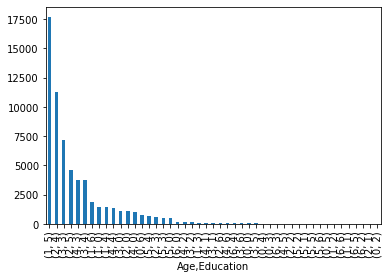

In [212]:
tag2[['Age','Education']].value_counts().plot(kind='bar')

<AxesSubplot:>

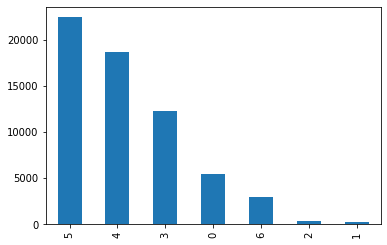

In [213]:
tag2['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

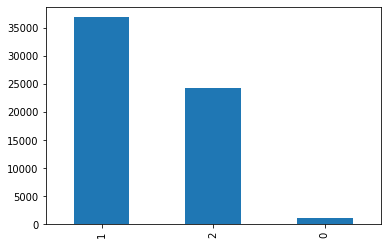

In [214]:
tag2['Gender'].value_counts().plot(kind='bar')

In [169]:
train['Age'].value_counts().plot(kind='bar')

1    38996
2    26744
3    18529
4    10654
5     2922
0     1666
6      489
Name: Age, dtype: int64

<AxesSubplot:>

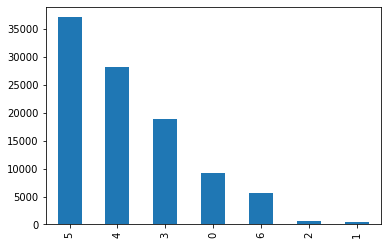

In [101]:
train['Education'].value_counts().plot(kind='bar')

<AxesSubplot:>

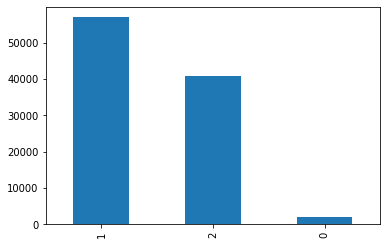

In [102]:
train['Gender'].value_counts().plot(kind='bar')

In [85]:
'时间' in stop_words

False

In [137]:
df6

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag2
7,7,0BA56489237BC91353300BE44298C6D8,6,1,0,昂的笔顺\t三年级上册数学口算\t牛的英语怎么读\t抓木机\t60米差不多跑多长时间\t似乎...,昂/的/笔顺\t三年级/上册/数学/口/算\t牛/的/英语/怎么/读\t抓/木机\t60/米...,60/米/差不多/跑/多长时间\tw0rd2007/以上/版是/哪种\t320/接近/300...,1
15,15,70901A790856356C1193040D4952233A,6,1,3,吴靖平\t使用假征值税发票属什么行为\t抽到81签的解释\t奔驰车轿车为什么不是大标志图\t...,吴靖平\t使用/假征/值税/发票/属/什么/行为\t抽到/81/签/的/解释\t奔驰车/轿车...,抽到/81/签/的/解释\t查/8/月/1/日至/7/日/天气预报\t昂科雷/3.6/l13...,1
141,141,F915B50922F1AF603B18B6297D847993,6,1,0,白银连环杀人案图片\tqq影音字幕另存为\thermine台风\t前列腺快感\t布兰丁斯城堡...,白银/连环/杀人案/图片\tqq/影音/字幕/另存为\thermine/台风\t前列腺/快感...,"英国/人口数量/2016\t平安/回访/要求/回复/p5/,/是/骗子/吗\t2003/ /...",0
231,231,720343440D2C5B7908A391037ED7A911,6,1,0,五牙直播\t元彪\t逆战刀战平砍\t处女男喜欢一个人的表现\t夏佐解说逆战刀战视频\t逆战\...,五牙/直播\t元彪\t逆/战刀/战平/砍\t处女/男/喜欢/一个/人/的/表现\t夏佐/解说...,咒怨/2\tmikumikudance/视频/普通/disico/ /0\twww/./ /...,1
293,293,1546DC35F5EBF3C3C344A4FE0A3EBB69,6,0,0,西普大陆\t终极蜘蛛侠\t网络测速\t朱碧石\t精灵宝可梦xyz最新\tvivoxplay5...,西普/大陆\t终极/蜘蛛侠\t网络/测速\t朱碧石\t精灵/宝可梦/xyz/最新\tvivo...,vivoxplay5/旗舰版\t黄金/圣斗士/实力/排名/ /黄金/魂/1001/黄金/圣斗...,1
...,...,...,...,...,...,...,...,...,...
98001,98001,50FDE4B92DA58A7D3DB6FA5C9DFC449F,6,2,0,九域神皇\t悲欢离合的意思是什么\t朝花夕拾大的创作时间是1926年二月到十一月\t应和的拼...,九域/神皇\t悲欢离合/的/意思/是/什么\t朝花夕拾/大/的/创作/时间/是/1926/年...,朝花夕拾/大/的/创作/时间/是/1926/年/二月/到/十一月\t作文/大全/600/字\...,1
98227,98227,ECC5E4EAF8B025E8B4E04A57A93C46F5,6,2,0,大中华\t一个都不能少\t心是开不败的花\tzutter中文歌词翻译\t骏马奔驰保边疆\t欠...,大中华\t一个/都/不能/少\t心是/开/不败/的/花\tzutter/中文歌词/翻译\t骏...,曾仕强/易经/的/智慧/ /1/-/160/ /集\t一剪梅/电视剧/84/版\t恋曲/20...,0
98928,98928,D04E620F903AD0B69B7777312500807D,6,2,4,方正东亚89恒大\t买楼层18层好不好\t房产税按面积如何征收\t宁波到杭州动车多少钱\t拆...,方正/东亚/89/恒大\t买/楼层/18/层/好不好\t房产税/按/面积/如何/征收\t宁波...,方正/东亚/89/恒大\t买/楼层/18/层/好不好\t拆迁/达到/分户/条件/一套/100...,1
99126,99126,5375DBDE7D171E858E931B757290126E,6,1,4,柳传志简介\t彦\t林西季烁东\t东方红1lf-545液压翻转犁价格\t东方红1lf-545...,柳传志/简介\t彦\t林西/季烁/东\t东方红/1lf/-/545/液压/翻转/犁/价格\t...,东方红/1lf/-/545/液压/翻转/犁/价格\t东方红/1lf/-/545/液压/翻转/...,1


In [241]:
df15

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,tag2
54,54,E4F98780A462BF5697BBF81E9638F2E3,1,1,6,直升机空战中文版破解 无限金币\t63km等于多少公里\t普通墨镜\t陈赫那里人\t福州\t...,直升机/空战/中文版/破解/ /无限/金币\t63km/等于/多少/公里\t普通/墨镜\t陈...,63km/等于/多少/公里\t4008277828/@/b/./qq/./com\t36o/...,0.000000
93,93,63E8EFD076E5D0C29EA6CD3446957898,1,2,6,我的课余生活作文300字\t做自己喜欢的事作文\tangelababy\t水浒传的人物五位\...,我/的/课余/生活/作文/300/字\t做/自己/喜欢/的/事/作文\tangelababy...,我/的/课余/生活/作文/300/字\t关于/开学/了/小/练笔/200/字\t关于/开学/...,0.011834
127,127,2AB1B6F4D8043992C5BE75B158172265,1,2,6,大白兔奶糖的寓意\t中国女排\t张鲁一\t微微一笑很倾城电影演员表\t上饶汽车站\toppo...,大白兔/奶糖/的/寓意\t中国女排\t张鲁一\t微微一笑/很/倾城/电影演员/表\t上饶/汽...,oppor9\t2016/年/证券/从业/资格考试/时间\t9.21/是/什么/星座\t逻辑...,0.000000
132,132,D0E9FCC676DDB953D6C24C372B391C0B,1,2,6,奇迹暖暖小画家\t恋爱火花\t溜来\tqq被虚拟机登录什么情况\t奇迹暖暖第十章过关套装\t...,奇迹/暖/暖/小/画家\t恋爱/火花\t溜/来\tqq/被/虚拟机/登录/什么/情况\t奇迹...,奇迹/暖/暖/1/次/几个/桂花/糕\t生物学/补充/习题/8/年纪/上册/苏教版/徐州\t...,0.105670
174,174,B2270A7D8755E35148CDB6561CD806A8,1,0,6,蛇蛇大作战手机版\t煮妇也疯狂相思成疾\t新水浒传西门庆是哪集\t水浒传潘金莲和西门\t流氓...,蛇/蛇/大/作战/手机/版\t煮妇/也/疯狂/相思/成疾\t新/水浒传/西门庆/是/哪集\t...,流氓/片/360/个/视频/视频\t36o\t4399/生死/狙击\t酷/我/音乐盒/手机/...,0.000000
...,...,...,...,...,...,...,...,...,...
99924,99924,D5B7C45F21BBB8B1073E6212741585DD,1,1,6,罗基铭\t龙王传说\t南方冬天有什么景物\t罗俊\t血族小说\tcf\t手机病毒不能卸载不了...,罗基铭\t龙王/传说\t南方/冬天/有/什么/景物\t罗俊\t血族/小说\tcf\t手机/病...,龙族/4\t龙族/5,0.000000
99942,99942,ACDF87BFBBC8946B0DD6DEE9A6EC90FD,1,1,6,百多邦软膏的作用价格\t激光点痣第七天还没有结痂\t微信\t维生素e胶丸\t清远两年的车如何...,百多/邦/软膏/的/作用/价格\t激光/点痣/第七天/还/没有/结痂\t微信\t维生素/e/...,601717\t37/岁/做/激光/点/痣/会/有/红印/吗\t5/ /5/ /5/ /55...,0.170732
99943,99943,37BB527D0ACD53FB0B9FCF44133944DD,1,1,6,qq头像\tlol逃跑惩罚\t北京时间\t电玩巴士\t电玩飞机视频\t刀锋女王莫甘娜小智解说...,qq/头像\tlol/逃跑/惩罚\t北京/时间\t电玩/巴士\t电玩/飞机/视频\t刀锋/女...,1991/-/8/-/22\t苹果/6splus/多少/钱\t球球/大/作战/九月/黄金/段...,0.000000
99954,99954,0A55FEC325C89F6A4AE0F5084A500B16,1,2,6,老兵为马本斋守墓\t吉林大学校园命案\t农妇坐11年冤狱\t别墅群荒废似鬼城\t赵薇和章子怡...,老兵/为/马本斋/守墓\t吉林大学/校园/命案\t农妇/坐/11/年/冤狱\t别墅/群/荒废...,农妇/坐/11/年/冤狱\t老人/要/1/元/赡养费\t夫妇/20/年生/13/个/儿子\t...,0.000000


In [8]:
def len_query(x):
    return len(x.split('\t'))

In [12]:
train1 = train[train['num_tag'].notnull()]

In [13]:
train1.head()

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag
0,0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,柔和/双沟\t女生\t中财网/首页/ /财经\thttp/://///pan/./baidu...,http/://///pan/./baidu/./com///s///1plpjtn9\t周...
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\...",250ml/牛奶/用/多少/克/奶粉/冲\t学会/爱/自己/ /才/会/真正/懂得/爱/10...
2,2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,钻石/之泪/耳机\t盘锦/到/沈阳\t旅顺/公交\t辽宁/阜新/车牌\tbaidu\tk71...,k715\tk716\t雷克萨斯/nx300h/价格\t苹果/7/合约/套餐\t网盘/007...
3,3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,最/受欢迎/狗狗/排行榜\t舶/怎么/读\t场景/描/ /写/范例\t三维/绘图/软件\t枣...,豆桨/和/面皮/能/一起/1/吃/吗\t新闻/2o16\tg20/峰会
4,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...,12306\t唯品/会上/卖/的/ipadair32g/真的假/的\tipad/ /air2...


In [17]:
train1['num_freq'] = (train1['num_tag'].apply(len_query))/(train1['Query_List'].apply(len_query))

<ipython-input-17-26f3dc913a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['num_freq'] = (train1['num_tag'].apply(len_query))/(train1['Query_List'].apply(len_query))


In [18]:
train1['num_freq']

,Unnamed: 0,ID,Age,Gender,Education,Query_List,Query_List_New,num_tag,num_freq
0,0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...,柔和/双沟\t女生\t中财网/首页/ /财经\thttp/://///pan/./baidu...,http/://///pan/./baidu/./com///s///1plpjtn9\t周...,0.160000
1,1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只...","广州/厨宝/烤箱\t世情/薄/,/人情/恶/,/雨送/黄昏/花易落/,/晓/风干/,/泪痕\...",250ml/牛奶/用/多少/克/奶粉/冲\t学会/爱/自己/ /才/会/真正/懂得/爱/10...,0.118280
2,2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...,钻石/之泪/耳机\t盘锦/到/沈阳\t旅顺/公交\t辽宁/阜新/车牌\tbaidu\tk71...,k715\tk716\t雷克萨斯/nx300h/价格\t苹果/7/合约/套餐\t网盘/007...,0.096154
3,3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...,最/受欢迎/狗狗/排行榜\t舶/怎么/读\t场景/描/ /写/范例\t三维/绘图/软件\t枣...,豆桨/和/面皮/能/一起/1/吃/吗\t新闻/2o16\tg20/峰会,0.017341
4,4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...,干槽症/能/自愈/吗\t太太/万岁/叶/舒心/去/没/去/美国\t干槽症\t右/眼皮/下面/...,12306\t唯品/会上/卖/的/ipadair32g/真的假/的\tipad/ /air2...,0.094017
...,...,...,...,...,...,...,...,...,...
99995,99995,E797FFCDCAF3899AB4D17B61170D8BFF,1,1,5,梦三生\t逆行天后漫画结局\t英雄联盟角色介绍大全\t韩剧网最新韩国电视剧\t119宣传语是...,梦/三生\t逆行/天后/漫画/结局\t英雄/联盟/角色/介绍/大全\t韩剧/网/最新/韩国/...,119/宣传语/是/什\t78/的/历史\t斗破/苍穹/之/肆虐/彩鳞/4\t龙族/2/漫画...,0.105263
99996,99996,E06375F7D092ABDE78C2D79E4725D6B0,1,1,5,中国军队配枪\t女生\t央视版权问题\t重庆\t一次性手术刀\t精神枷锁\t人民检察官\t舆...,中国/军队/配枪\t女生\t央视/版权/问题\t重庆\t一次性/手术刀\t精神枷锁\t人民/...,cctv1/以往/节目单\tmh370\t411949953886\tcctv1/节目单\t...,0.049834
99997,99997,D55119CB0B9366B20974522B58C00912,2,2,5,英文翻译\t幼儿园面试讲课\t学前教育书第二版\tshock to\t幼儿园教师资格证面试讲...,英文翻译\t幼儿园/面试/讲课\t学前教育/书/第二/版\tshock/ /to\t幼儿园/...,"我能/每次/主动/找/你/,/是因为/曾经/你/在/我/心里/有/?/oppo819",0.011111
99998,99998,EB4DBBD602C6459A19A77F09035E170C,3,2,3,哈尔滨祖研中医院地址\t指甲盖侧面的肉怎么是白色\t补骨质有副作用吗\t哈尔滨去呼兰\t黑龙...,哈尔滨/祖研/中/医院地址\t指甲盖/侧面/的/肉/怎么/是/白色\t补/骨质/有/副作用/...,500/克是/多少/斤\t小米/5\t小米/5s\t白/蒺藜/子/多少/钱/一斤/1001/...,0.053571


In [40]:
train2 = train1[train1['num_freq']>=0.1]

<AxesSubplot:>

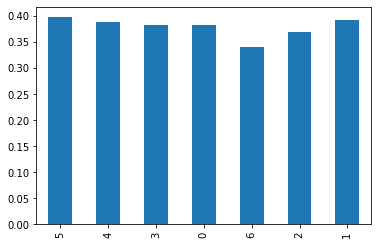

In [41]:
(train2['Education'].value_counts()/train['Education'].value_counts()).plot(kind='bar')

<AxesSubplot:>

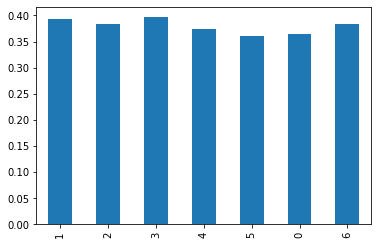

In [42]:
(train2['Age'].value_counts()/train['Age'].value_counts()).plot(kind='bar')

<AxesSubplot:>

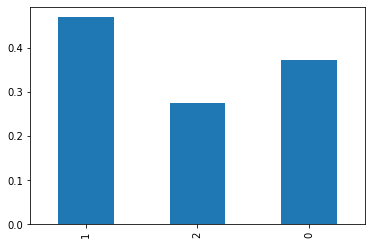

In [43]:
(train2['Gender'].value_counts()/train['Gender'].value_counts()).plot(kind='bar')